# Get to know the sub_data

In this notebook I want to discover the data in order to build a CNN. It should be able to predict the age of wood based on the wooden samples' absorbance of Near-Infrared light. 

# Load the necessary libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

# Import the data

In [2]:
csv_directory = '/home/mel/Masterthesis/Masterthesis_code/raw_data/csv/'

# Look at all files in the directory an then chose dps1200.csv which contain the dataframes of our interest
all_csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.csv')]
print(all_csv_files)
csv_files = ['dpsDeriv1200.csv','dps1200.csv']

['dpsUNsub1.csv', 'dpsDeriv1200AUT.csv', 'dpsDerivSK.csv', 'dpsDeriv1200.csv', 'dpsSK.csv', 'dpsWOCHPls1.csv', 'dps1200POL.csv', 'dpsDeriv1200Pls1.csv', 'dpsDerivPls1.csv', 'dps1200AUT.csv', 'dps.csv', 'dpsDeriv1200POL.csv', 'dpsDerivUNsub1.csv', 'dpsUN.csv', 'dpsDerivLUO.csv', 'dps1200Pls1.csv', 'dpsExcl.csv', 'dps1200_all.csv', 'dpsDeriv.csv', 'dpsUNsub3.csv', 'dpsLUO.csv', 'dpsPls1.csv', 'dpsDerivUN.csv', 'dpsDerivWOCHPls1.csv', 'dpsDeriv1200SK.csv', 'dps1200SK.csv', 'dpsDerivWOCH.csv', 'dpsDerivExcl.csv', 'dpsUNsub2.csv', 'dpsDerivUNsub3.csv', 'dps1200.csv', 'dpsDerivUNsub2.csv', 'dpsWOCH.csv']


In [3]:
dps1200 = pd.read_csv(f'{csv_directory}/dps1200.csv')

## About the dataframe

There are 2 dataframes.

dps1200 = data from Pinus silvestris. It contains only samples which are dated to the year 1200 and younger. The data are already smoothed. 
dpsDeriv1200 = it is the second derivation of dps1200

The columns contain information about the year (estimated age of the wood), the name of the tree (for sample assignment), the country where the tree was found and the type refers to the preservation condition of the wood. The rest of the columns are the different wavenumbers and their corresponding values are the absorbances. The absorbance indicates the state of molecular decay of the sample.

In [4]:
print(dps1200.iloc[:10, :7])
type(dps1200)

   year     tree Origin    type     X2970     X2968     X2966
0  1955  2GOS-18    POL  living  0.019849  0.020121  0.020414
1  1969  2GOS-18    POL  living  0.023933  0.024378  0.024827
2  1974  2GOS-18    POL  living  0.021605  0.021971  0.022342
3  1976  2GOS-18    POL  living  0.021999  0.022315  0.022651
4  1996  2GOS-18    POL  living  0.021031  0.021338  0.021626
5  2000  2GOS-18    POL  living  0.020568  0.020845  0.021142
6  2005  2GOS-18    POL  living  0.020037  0.020322  0.020602
7  1719   2Grc01    POL  constr  0.018613  0.018812  0.019021
8  1722   2Grc01    POL  constr  0.020607  0.020854  0.021116
9  1727   2Grc01    POL  constr  0.020582  0.020823  0.021077


pandas.core.frame.DataFrame

In [5]:
# Remove the X from the bandwithds
dps1200.rename(columns=lambda x: x.replace('X', ''), inplace=True)
print(dps1200.iloc[:10, :7])

   year     tree Origin    type      2970      2968      2966
0  1955  2GOS-18    POL  living  0.019849  0.020121  0.020414
1  1969  2GOS-18    POL  living  0.023933  0.024378  0.024827
2  1974  2GOS-18    POL  living  0.021605  0.021971  0.022342
3  1976  2GOS-18    POL  living  0.021999  0.022315  0.022651
4  1996  2GOS-18    POL  living  0.021031  0.021338  0.021626
5  2000  2GOS-18    POL  living  0.020568  0.020845  0.021142
6  2005  2GOS-18    POL  living  0.020037  0.020322  0.020602
7  1719   2Grc01    POL  constr  0.018613  0.018812  0.019021
8  1722   2Grc01    POL  constr  0.020607  0.020854  0.021116
9  1727   2Grc01    POL  constr  0.020582  0.020823  0.021077


In order to train the CNN model only the year (label) and the bandwidths are needed. 

In [6]:
dps1200 = dps1200.drop(dps1200.columns[1:4], axis=1)
print(dps1200.iloc[:10, :7])

   year      2970      2968      2966      2964      2962      2960
0  1955  0.019849  0.020121  0.020414  0.020724  0.021030  0.021321
1  1969  0.023933  0.024378  0.024827  0.025273  0.025712  0.026149
2  1974  0.021605  0.021971  0.022342  0.022719  0.023099  0.023470
3  1976  0.021999  0.022315  0.022651  0.022999  0.023345  0.023682
4  1996  0.021031  0.021338  0.021626  0.021923  0.022248  0.022589
5  2000  0.020568  0.020845  0.021142  0.021458  0.021778  0.022096
6  2005  0.020037  0.020322  0.020602  0.020878  0.021156  0.021446
7  1719  0.018613  0.018812  0.019021  0.019235  0.019443  0.019650
8  1722  0.020607  0.020854  0.021116  0.021387  0.021653  0.021909
9  1727  0.020582  0.020823  0.021077  0.021330  0.021564  0.021797


In [7]:
print(dps1200.shape)

(1290, 411)


# Get to know the data

## Dataset dps1200

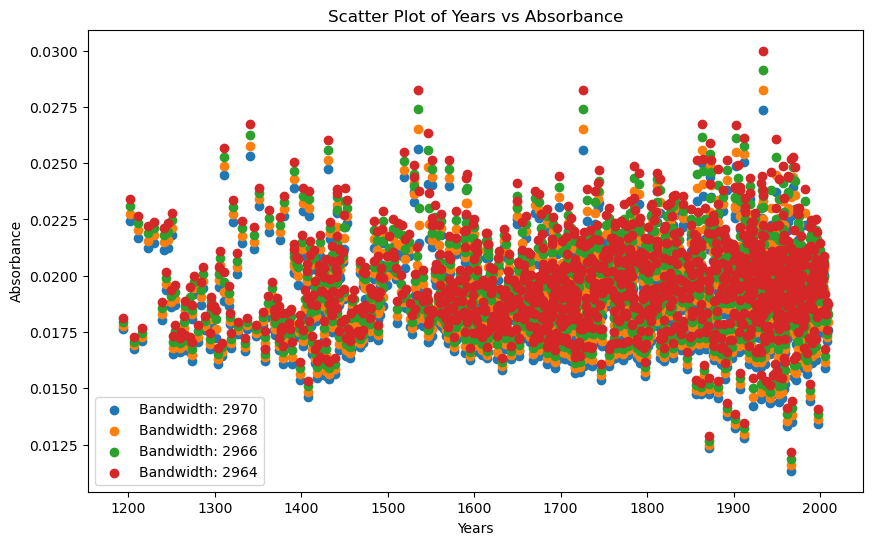

In [87]:
feature_index = 5  
x = dps1200.iloc[:, 0]
y = dps1200.iloc[:, 1]

plt.figure(figsize=(10, 6))  

for feature_index in range(1,5):
    plt.scatter(dps1200.iloc[1:, 0], dps1200.iloc[1:, feature_index], label= f'Bandwidth: {dps1200.columns.values[feature_index]}')

plt.xlabel('Years')
plt.ylabel('Absorbance')
plt.title('Scatter Plot of Years vs Absorbance')
plt.legend()
plt.show()

# Descriptive statistics

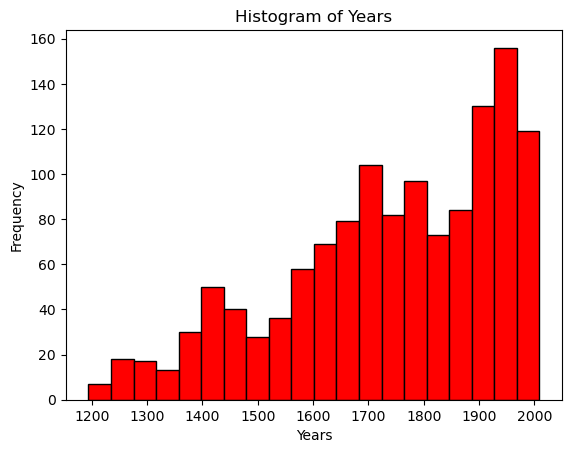

In [88]:
plt.hist(dps1200.iloc[:, 0], bins=20, color='red', edgecolor='black')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Histogram of Years')
plt.show()

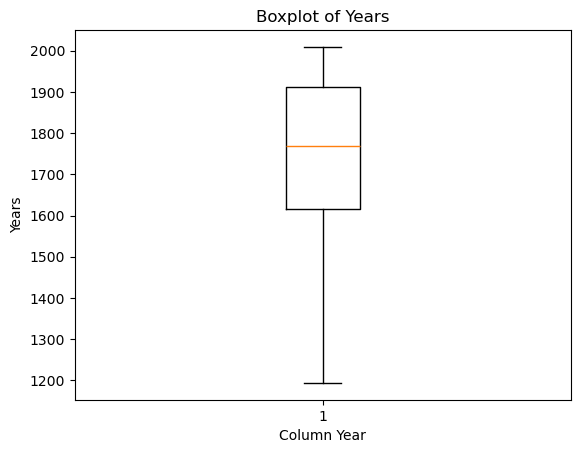

In [89]:
years = dps1200.iloc[:, 0]

plt.boxplot(years)
plt.xlabel('Column Year')
plt.ylabel('Years')
plt.title('Boxplot of Years')

# Show the plot
plt.show()

In [90]:
print(f'The years of the data range from {min(years)} - {max(years)} years.')

The years of the data range from 1194 - 2009 years.


In [91]:
# Get summary statistics
summary_stats = years.describe()

print(summary_stats)

count    1290.000000
mean     1740.420930
std       196.420289
min      1194.000000
25%      1616.000000
50%      1769.000000
75%      1913.000000
max      2009.000000
Name: year, dtype: float64


In [8]:
spectrum = dps1200.iloc[1:,1:]
full_spec = spectrum.columns.values
full_spec = full_spec.astype(int)

print(f'The spectrum of the data ranges from {min(full_spec)} - {max(full_spec)} cm-1.')

The spectrum of the data ranges from 800 - 2970 cm-1.


In [9]:
# Get summary statistics
summary_stats = spectrum.describe()

print(summary_stats)

              2970         2968         2966         2964         2962  \
count  1289.000000  1289.000000  1289.000000  1289.000000  1289.000000   
mean      0.018826     0.019122     0.019426     0.019740     0.020060   
std       0.001923     0.001979     0.002039     0.002101     0.002163   
min       0.011339     0.011597     0.011871     0.012159     0.012466   
25%       0.017551     0.017788     0.018043     0.018322     0.018586   
50%       0.018673     0.018940     0.019229     0.019521     0.019801   
75%       0.019993     0.020271     0.020569     0.020911     0.021259   
max       0.027378     0.028247     0.029124     0.029990     0.030832   

              2960         2959         2957         2955         2953  ...  \
count  1289.000000  1289.000000  1289.000000  1289.000000  1289.000000  ...   
mean      0.020388     0.020727     0.021078     0.021438     0.021808  ...   
std       0.002223     0.002280     0.002334     0.002386     0.002438  ...   
min       0.01279

In [10]:
means = summary_stats.iloc[1]
stds = summary_stats.iloc[2]

In [11]:
print(f'The means of the different bandwidths range from {min(means)} - {max(means)} cm-1.')
print(f'The standard deviations of the different bandwidths range from {min(stds)} - {max(stds)}.')

The means of the different bandwidths range from -0.02331803833204034 - 0.031635586416602024 cm-1.
The standard deviations of the different bandwidths range from 0.0011155345869856613 - 0.007615790423965224.


## Spectra of two samples per century

In order to look at the differences in the spectra, two random samples per century were selected and plotted.

In [96]:
# Function to select 2 random samples for each century
def select_random_samples(df):
    samples = []
    for century in range(12, 21): 
        century_data = df[df['year'] // 100 == century]
        if len(century_data) >= 2:
            random_samples = century_data.sample(2)
            samples.append(random_samples)
    return pd.concat(samples)

random_samples = select_random_samples(dps1200)

print(random_samples)

      year      2970      2968      2966      2964      2962      2960  \
362   1271  0.018267  0.018661  0.019074  0.019495  0.019908  0.020303   
361   1261  0.016708  0.016952  0.017222  0.017502  0.017788  0.018094   
335   1366  0.018856  0.019144  0.019440  0.019737  0.020035  0.020346   
371   1326  0.020078  0.020369  0.020673  0.020989  0.021310  0.021636   
299   1474  0.018963  0.019434  0.019904  0.020368  0.020817  0.021249   
152   1448  0.020605  0.020743  0.020885  0.021053  0.021250  0.021461   
90    1567  0.017321  0.017571  0.017813  0.018055  0.018298  0.018550   
145   1577  0.016637  0.016839  0.017062  0.017294  0.017523  0.017750   
442   1616  0.020796  0.020977  0.021181  0.021404  0.021634  0.021884   
236   1697  0.017637  0.017943  0.018268  0.018604  0.018944  0.019295   
23    1766  0.019245  0.019461  0.019694  0.019943  0.020201  0.020479   
1003  1717  0.017452  0.017788  0.018131  0.018486  0.018849  0.019216   
479   1833  0.020293  0.020693  0.0210

In [104]:
# mask the missing regions
y = random_samples.iloc[:,1:]
xp = y.columns.values
xp = xp.astype(int)

for i in range(1, len(xp)):
    diff = xp[i-1] - xp[i]

    if diff > 10:
        print(f"gap found @ indices {i-1},{i} -> {xp[i-1]} vs {xp[i]}")

        for s in range(y.shape[0]):
            y.iloc[s,i] = np.ma.masked

gap found @ indices 88,89 -> 2800 vs 1771
gap found @ indices 172,173 -> 1610 vs 1271
gap found @ indices 375,376 -> 881 vs 864


/home/mel/anaconda3/envs/tensor/lib/python3.11/site-packages/pandas/core/internals/blocks.py:1429: UserWarning: Warning: converting a masked element to nan.
  values[indexer] = casted


Look at all spectra ungrouped.

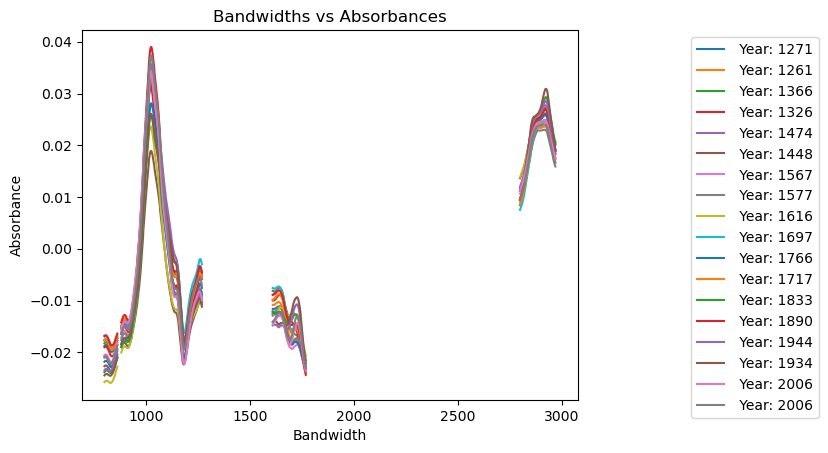

In [106]:
n = 0
for row in y.iterrows():
    plt.plot(xp, row[1], label=f' Year: {random_samples.iloc[n,0]}')
    n += 1

plt.title('Bandwidths vs Absorbances')
plt.xlabel('Bandwidth')
plt.ylabel('Absorbance')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()


Grouping two centuries together and look at the spectrum. 

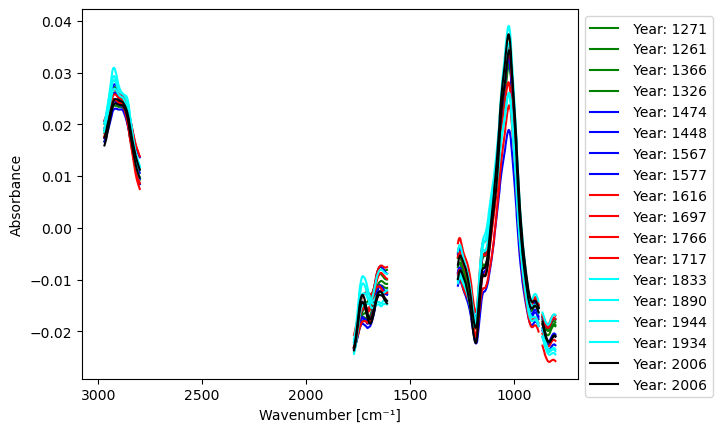

In [107]:
# Assign colors based on centuries
century_colors = {12: 'green', 13: 'green', 14: 'blue', 15: 'blue', 16: 'red', 17: 'red', 18: 'cyan', 19: 'cyan', 20: 'black'}

n = 0
for row in y.iterrows():
    century = int(str(random_samples.iloc[n,0])[:2])  # Extract century from the Year
    plt.plot(xp, row[1], label=f' Year: {random_samples.iloc[n,0]}', color=century_colors.get(century)) 
    n += 1

plt.gca().invert_xaxis()
#plt.title('Bandwidths vs Absorbances')
plt.xlabel('Wavenumber [cm⁻¹]')
plt.ylabel('Absorbance')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


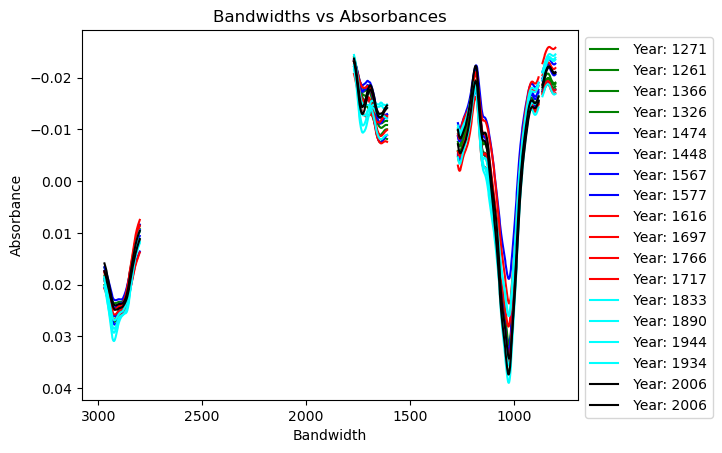

In [108]:
# Assign colors based on centuries
century_colors = {12: 'green', 13: 'green', 14: 'blue', 15: 'blue', 16: 'red', 17: 'red', 18: 'cyan', 19: 'cyan', 20: 'black'}

n = 0
for row in y.iterrows():
    century = int(str(random_samples.iloc[n,0])[:2])  # Extract century from the Year
    plt.plot(xp, row[1], label=f' Year: {random_samples.iloc[n,0]}', color=century_colors.get(century)) 
    n += 1
plt.gca().invert_xaxis()  
plt.gca().invert_yaxis()
plt.title('Bandwidths vs Absorbances')
plt.xlabel('Bandwidth')
plt.ylabel('Absorbance')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

# Heatmap of the Input Spectra

In [109]:
features = dps1200.iloc[:, 1:].values
labels = dps1200.iloc[:, 0].values

In [110]:
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

In [111]:
test_labels_2d = test_labels.reshape(-1, 1)
test_data_all = np.concatenate((test_labels_2d, test_data), axis=1)

sorted_indices = np.argsort(test_data_all[:, 0])
test_all_sorted = test_data_all[sorted_indices]

sorted_test_labels = test_all_sorted[:, 0]
sorted_test_data = test_all_sorted[:, 1:]

In [112]:
print(sorted_test_data.shape)

(258, 410)


In [113]:
y = dps1200.iloc[:,1:]
xp = y.columns.values
xp = xp.astype(int)

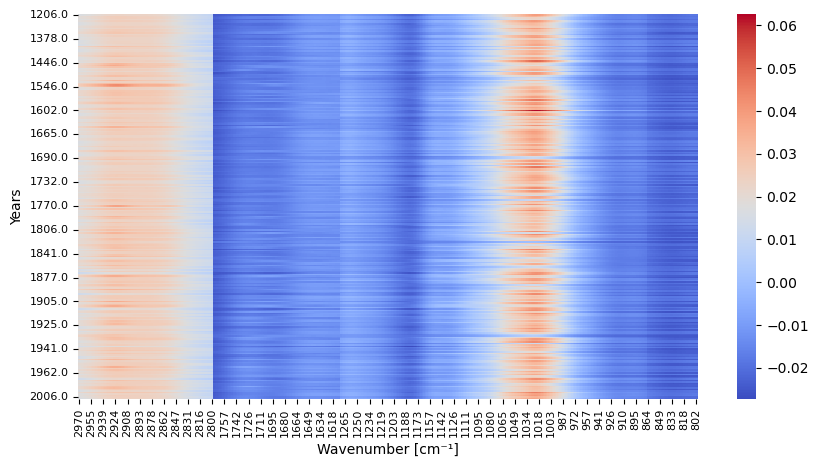

In [114]:
wavelengths = xp[::8]

years = sorted_test_labels[::16]

# Plot Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(sorted_test_data, cmap='coolwarm')
plt.xlabel('Wavenumber [cm⁻¹]')
plt.ylabel('Years')
#plt.title('Input Spectra Heatmap')
plt.xticks(ticks=np.arange(0.5, sorted_test_data.shape[1] + 0.5, 8), labels=wavelengths, fontsize=8)
plt.yticks(ticks=np.arange(0.5, sorted_test_data.shape[0] + 0.5, 16), labels=years, fontsize=8)
plt.show()